## SIFT Feature Matching


In [2]:
#Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [2]:
# References
# https://medium.com/data-breach/introduction-to-surf-speeded-up-robust-features-c7396d6e7c4e
# https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

In [6]:

#Feature Matching with sift
img1 = cv2.imread('C:\\Users\\saibh\\Documents\\adobe_panoramas\\data\\goldengate\\goldengate-10.png',cv2.IMREAD_GRAYSCALE)          
#img2 = cv2.imread('C:\\Users\\saibh\\Documents\\adobe_panoramas\\data\\fishbowl\\fishbowl-01.png',cv2.IMREAD_GRAYSCALE) 

# Load the image
image1 = cv2.imread('C:\\Users\\saibh\\Documents\\adobe_panoramas\\data\\goldengate\\goldengate-10.png')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Number of Keypoints Detected In The Training Image:  101
Number of Keypoints Detected In The Query Image:  100


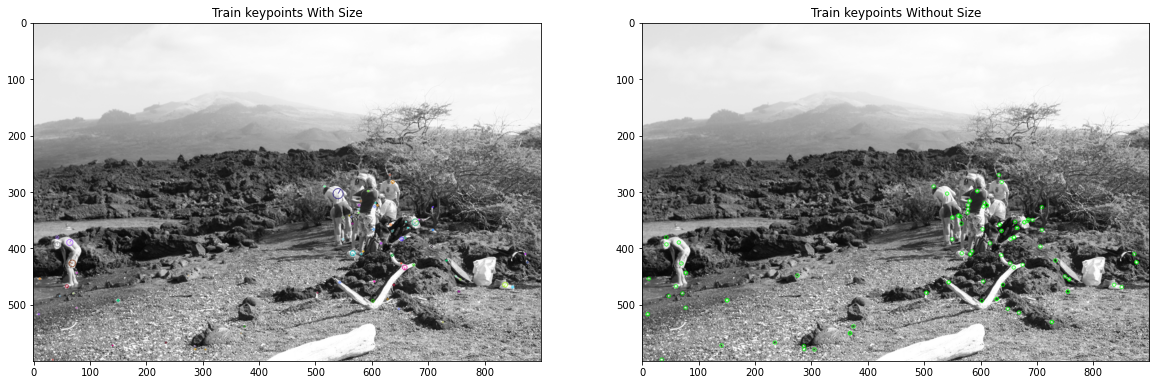

In [11]:
SIFT = cv2.SIFT_create(100)

train_keypoints, train_descriptor = SIFT.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = SIFT.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))



Number of Keypoints Detected In The Training Image:  50
Number of Keypoints Detected In The Query Image:  39


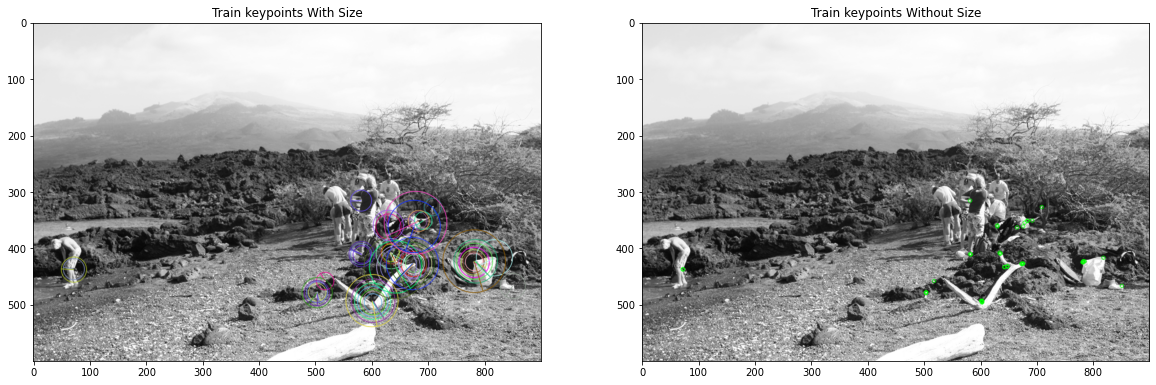

In [5]:
ORB = cv2.ORB_create(50)

train_keypoints_ORBtr, train_descriptor_ORBtr = ORB.detectAndCompute(training_gray, None)
test_keypoints_ORBtr, test_descriptor_ORBtr = ORB.detectAndCompute(test_gray, None)

keypoints_without_size_ORBtr = np.copy(training_image)
keypoints_with_size_ORBtr = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints_ORBtr, keypoints_without_size_ORBtr, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints_ORBtr, keypoints_with_size_ORBtr, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size_ORBtr, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size_ORBtr, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints_ORBtr))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints_ORBtr))



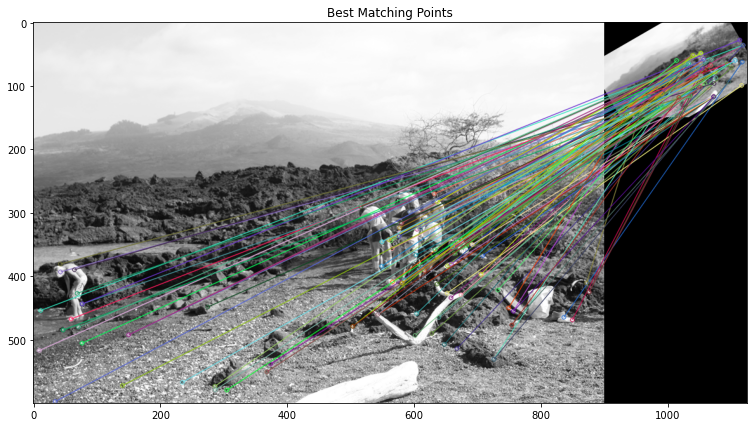

In [12]:

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

In [8]:

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_keypoints_ORBtr, train_keypoints_ORBtr)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints_ORBtr, test_gray, test_keypoints_ORBtr, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

error: OpenCV(4.5.4-dev) :-1: error: (-5:Bad argument) in function 'match'
> Overload resolution failed:
>  - queryDescriptors is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'queryDescriptors'
>  - queryDescriptors is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'queryDescriptors'
